Impporting the dependencies

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
#loading the data from csv to pandas dataframe
air_quality_data = pd.read_csv('/content/AirQualityUCI.csv')

Dataset isnt in proper structure. So,"sep" gets used to make dataset in proper way and decimals were in "comma". So, "decimal" gets used. And here, all the values in the dataset gets seperaated by "semicolon"

In [ ]:
#loading the data from csv to pandas dataframe
air_quality_data = pd.read_csv('/content/AirQualityUCI.csv',sep=';',decimal = ',')
air_quality_data.head()

In [ ]:
#removing the last 2 columns, because they were duplicate columns(using dataframe slicing, similar to string slicing in python)
air_quality_data = air_quality_data.iloc[:, :-2]
air_quality_data.head()

In [ ]:
#bringing the last 5 rows
air_quality_data.tail()

In [ ]:
#shape(rows,columns)
air_quality_data.shape

In [ ]:
#printing the 9356th row
air_quality_data.loc[[9356]]

index = 9356
row = 9357th rows

In [ ]:
#taking the first 9357 rows from the dataset
air_quality_data = air_quality_data.head(9357)

After making caluclations, finally tail,head and shape of the datasets were;

In [ ]:
air_quality_data.head()

In [ ]:
air_quality_data.tail()

In [ ]:
air_quality_data.shape

In [ ]:
#getting some info about the dataset
air_quality_data.info()

In [ ]:
#checking the number of missing values in the dataset
air_quality_data.isnull().sum()

There were no missing values in the dataset.By refering the dataset description, they have described that null values were termed as "-200"

In [ ]:
#counting the number of times -200 occours in the dataset
air_quality_data.isin([-200]).sum(axis=0)

**Handling the missing values**

Firstly,Converting all "-200" into "NaN". Secondly, the converted "NaN" were replaced by the mean of its own column

In [ ]:
air_quality_data = air_quality_data.replace(to_replace = -200, value = np.NaN)

In [ ]:
air_quality_data.isnull().sum()

Above snippet shows the actual value of missing values

In [ ]:
#comparing the first tail snippet with second tail snippet after changing and replacing the missing value
air_quality_data.tail()

In [ ]:
#bringing down the mean
air_quality_data.mean()

In [ ]:
#rplacing the missing value with mean value
air_quality_data = air_quality_data.fillna(air_quality_data.mean())

In [ ]:
air_quality_data.tail()

In [ ]:
#checking the number of missing values in the dataset
air_quality_data.isnull().sum()

Two tasks can be performed on this dataset.
1. Forecasting
2. Regression




Forecasting is done by using **FB Prophet Algorithm**.
1. FB Prophet Documentation: https://facebook.github.io/prophet/docs/quick_start.html

Below, where the time column from dataset, where "." is changed to ";"

In [ ]:
#converting the date from DD/MM/YYYY to YYYY-MM-DD
date_info = pd.to_datetime(air_quality_data['Date'], format='%d/%m/%Y')
print(date_info)


In [ ]:
time_info = air_quality_data['Time']

In [ ]:
print(time_info)

In [ ]:
time_info = time_info.apply(lambda x:x.replace('.',':'))

In [ ]:
print(time_info)

In [ ]:
print(type(date_info))
print(type(time_info))

In [ ]:
#combining 2 series to pandas as dataframe
date_time = pd.concat([date_info, time_info],axis=1)

In [ ]:
date_time.head()

In [ ]:
date_time.shape

In [ ]:
#combining date and time
date_time['ds'] = date_time['Date'].astype(str)+' '+date_time['Time'].astype(str)

In [ ]:
date_time.head()

In [ ]:
date_time.info()

From the output of above code snippet, the "Time" and ds its datatype is "object". so converting the datatype as "datetime"

In [ ]:
data = pd.DataFrame()

In [ ]:
data['ds'] = pd.to_datetime(date_time['ds'])

In [ ]:
data.head()

In [ ]:
data['y'] = air_quality_data['RH']

In [ ]:
data.head()

In [ ]:
pip install prophet

In [ ]:
from prophet import Prophet

In [ ]:
#Training the prophet(forecasting) model
model = Prophet()
model.fit(data)

In [ ]:
#For making Future Predictions
future = model.make_future_dataframe(periods = 365, freq='H')
future.tail()

In [ ]:
forecast = model.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
9717,2005-04-19 15:00:00,33.494204,18.262994,47.751645
9718,2005-04-19 16:00:00,33.977616,18.824276,49.376858
9719,2005-04-19 17:00:00,35.610862,19.163972,51.091649
9720,2005-04-19 18:00:00,38.506470,23.918945,55.175687
9721,2005-04-19 19:00:00,42.060689,27.025976,58.054996


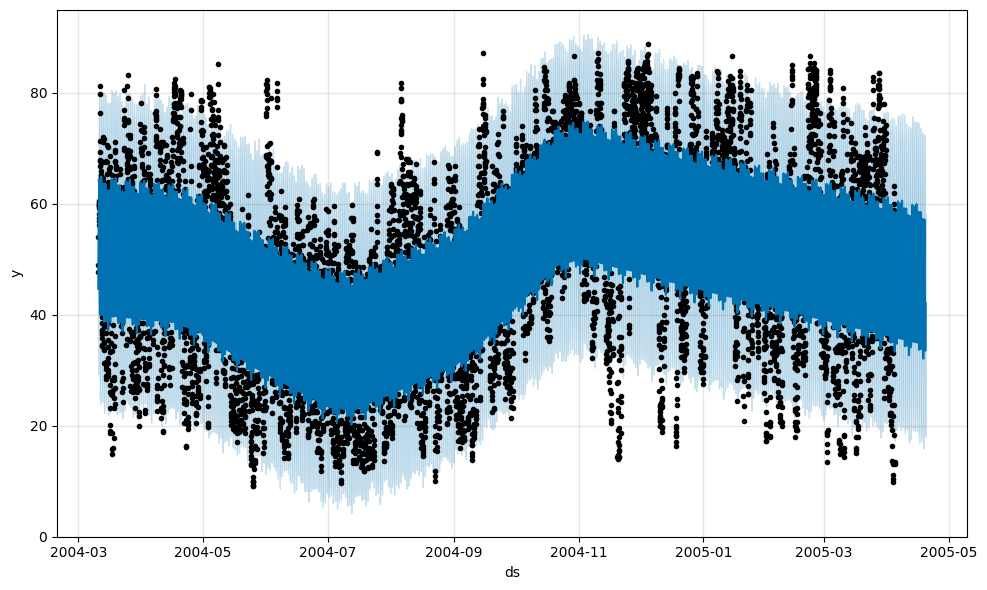

In [ ]:
fig1 = model.plot(forecast)

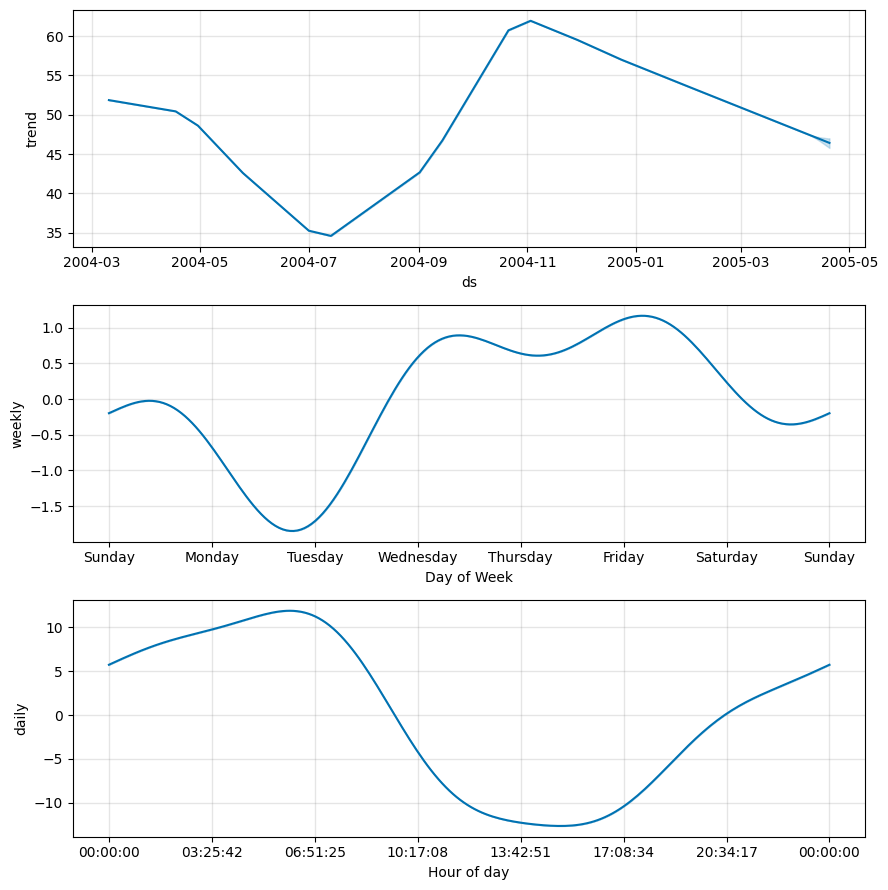

In [ ]:
fig2 = model.plot_components(forecast)